In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Load the dataset
# Replace the path with your dataset path or use pd.read_csv with the correct path if needed.
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_&export=download'
df = pd.read_csv(url)

# Data Exploration (Score: 2)
print("First few rows of the dataset:")
print(df.head())

# List unique values in each feature and find the length of unique values
print("\nUnique values in each feature and their counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Perform statistical analysis and renaming of columns if necessary
print("\nStatistical summary of the dataset:")
print(df.describe())

# Renaming columns if necessary (Example renaming if column names are inconsistent)
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

# Data Cleaning (Score: 2)
# Finding missing values and treating them appropriately
print("\nMissing values in each column:")
print(df.isnull().sum())

# Replace 0 in the 'age' column with NaN
df['age'].replace(0, np.nan, inplace=True)

# Treat missing values using mean, median, or mode
# Replacing NaN values with the median for 'age', 'salary', etc. (you can modify as needed)
df['age'].fillna(df['age'].median(), inplace=True)
df['salary'].fillna(df['salary'].median(), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Find outliers using Z-Score or IQR methods
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))  # Apply Z-score on numeric columns
outliers = (z_scores > 3).all(axis=1)  # Find rows where any column exceeds the Z-score threshold
print(f"\nNumber of outliers detected: {outliers.sum()}")

# Remove outliers
df_no_outliers = df[~outliers]

# Data Analysis (Score: 2)
# Filter data with age > 40 and salary < 5000
filtered_data = df_no_outliers[(df_no_outliers['age'] > 40) & (df_no_outliers['salary'] < 5000)]
print("\nFiltered data with age > 40 and salary < 5000:")
print(filtered_data.head())

# Plot chart with age and salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_outliers, x='age', y='salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Count the number of people from each place and represent it visually
plt.figure(figsize=(8, 5))
df_no_outliers['place'].value_counts().plot(kind='bar')
plt.title('Count of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

# Data Encoding (Score: 2)
# Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding)
# Assuming 'place' is a categorical column
df_encoded = pd.get_dummies(df_no_outliers, columns=['place'], drop_first=True)

# Data Scaling (Score: 2)
# Applying StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Standard Scaling
df_encoded_standard = df_encoded.copy()
df_encoded_standard[['age', 'salary']] = scaler_standard.fit_transform(df_encoded_standard[['age', 'salary']])

# Min-Max Scaling
df_encoded_minmax = df_encoded.copy()
df_encoded_minmax[['age', 'salary']] = scaler_minmax.fit_transform(df_encoded_minmax[['age', 'salary']])

# Display the scaled data
print("\nScaled data using StandardScaler:")
print(df_encoded_standard[['age', 'salary']].head())

print("\nScaled data using MinMaxScaler:")
print(df_encoded_minmax[['age', 'salary']].head())

# Saving the final preprocessed dataset
df_encoded_standard.to_csv('preprocessed_data_standard_scaled.csv', index=False)
df_encoded_minmax.to_csv('preprocessed_data_minmax_scaled.csv', index=False)


First few rows of the dataset:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Unique values in each feature and their counts:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values

Statistical summary of the dataset:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000

Missing values in each column:
Company     8

KeyError: 'age'

First few rows of the dataset:
   company   age  salary     place country  gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Unique values in each feature and their counts:
company: 6 unique values
age: 29 unique values
salary: 40 unique values
place: 11 unique values
country: 1 unique values
gender: 2 unique values

Statistical summary of the dataset:
              age       salary      gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000

Missing values in each column:
company     8

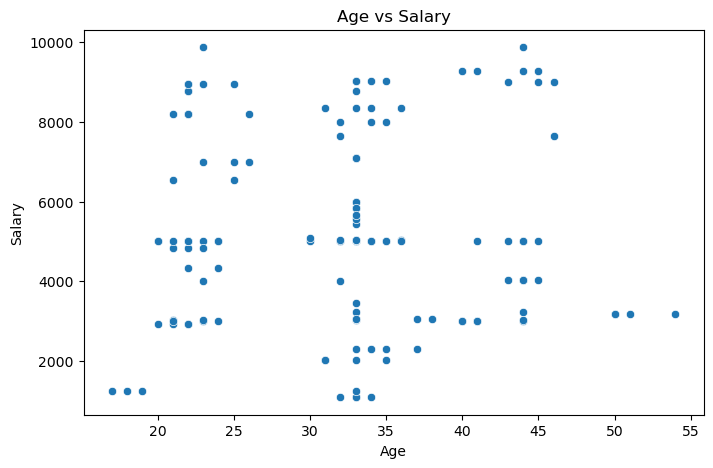

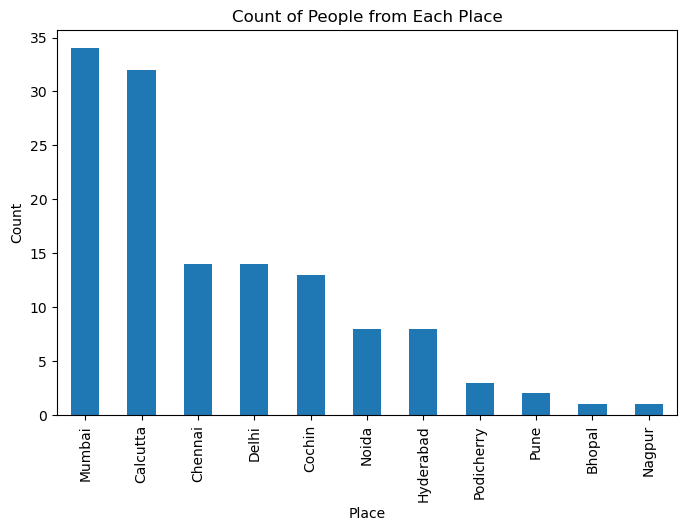


Scaled data using StandardScaler:
        age    salary
0 -1.484676 -0.100827
1 -0.267174 -0.100827
2  0.341577 -1.243735
3  0.950328 -0.947426
4 -1.119426 -0.524127

Scaled data using MinMaxScaler:
        age    salary
0  0.081081  0.445089
1  0.351351  0.445089
2  0.486486  0.137817
3  0.621622  0.217480
4  0.162162  0.331285


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Load the dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_&export=download'
df = pd.read_csv(url)

# Clean column names: remove extra spaces and normalize case
df.columns = df.columns.str.strip().str.lower()  # Making column names lowercase and removing extra spaces

# Data Exploration (Score: 2)
print("First few rows of the dataset:")
print(df.head())

# List unique values in each feature and find the length of unique values
print("\nUnique values in each feature and their counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Perform statistical analysis and renaming of columns if necessary
print("\nStatistical summary of the dataset:")
print(df.describe())

# Data Cleaning (Score: 2)
# Finding missing values and treating them appropriately
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check if 'age' column exists
if 'age' in df.columns:
    # Replace 0 in the 'age' column with NaN
    df['age'].replace(0, np.nan, inplace=True)

    # Treat missing values using mean, median, or mode
    df['age'].fillna(df['age'].median(), inplace=True)
else:
    print("The 'age' column does not exist.")

# Check if 'salary' column exists
if 'salary' in df.columns:
    # Replace missing salary values with the median
    df['salary'].fillna(df['salary'].median(), inplace=True)
else:
    print("The 'salary' column does not exist.")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Find outliers using Z-Score or IQR methods
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))  # Apply Z-score on numeric columns
outliers = (z_scores > 3).all(axis=1)  # Find rows where any column exceeds the Z-score threshold
print(f"\nNumber of outliers detected: {outliers.sum()}")

# Remove outliers
df_no_outliers = df[~outliers]

# Data Analysis (Score: 2)
# Filter data with age > 40 and salary < 5000
filtered_data = df_no_outliers[(df_no_outliers['age'] > 40) & (df_no_outliers['salary'] < 5000)]
print("\nFiltered data with age > 40 and salary < 5000:")
print(filtered_data.head())

# Plot chart with age and salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_outliers, x='age', y='salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Count the number of people from each place and represent it visually
if 'place' in df.columns:
    plt.figure(figsize=(8, 5))
    df_no_outliers['place'].value_counts().plot(kind='bar')
    plt.title('Count of People from Each Place')
    plt.xlabel('Place')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'place' column does not exist.")

# Data Encoding (Score: 2)
# Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding)
# Assuming 'place' is a categorical column
df_encoded = pd.get_dummies(df_no_outliers, columns=['place'], drop_first=True)

# Data Scaling (Score: 2)
# Applying StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Standard Scaling
df_encoded_standard = df_encoded.copy()
df_encoded_standard[['age', 'salary']] = scaler_standard.fit_transform(df_encoded_standard[['age', 'salary']])

# Min-Max Scaling
df_encoded_minmax = df_encoded.copy()
df_encoded_minmax[['age', 'salary']] = scaler_minmax.fit_transform(df_encoded_minmax[['age', 'salary']])

# Display the scaled data
print("\nScaled data using StandardScaler:")
print(df_encoded_standard[['age', 'salary']].head())

print("\nScaled data using MinMaxScaler:")
print(df_encoded_minmax[['age', 'salary']].head())

# Saving the final preprocessed dataset
df_encoded_standard.to_csv('preprocessed_data_standard_scaled.csv', index=False)
df_encoded_minmax.to_csv('preprocessed_data_minmax_scaled.csv', index=False)

